# Test environnement CartPoleContinuous avec CACLA

Reproduction de l'environnement de test CartPoleContinuous pour le papier https://dspace.library.uu.nl/bitstream/handle/1874/25514/wiering_07_reinforcementlearning.pdf

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
import sys
import numpy as np

sys.path.insert(0, '../')
from utils.CartPoleContinuous import ContinuousCartPoleEnv
from utils.Critic import CriticNetwork
from utils.Actor import ActorNetwork
from utils.CACLA import CACLA
from utils.CACLAVAR import CACLAVAR

from tqdm import tqdm

## hyper paramètres

In [4]:
action_space = 1
observation_space = 4

env = ContinuousCartPoleEnv()
actor_network = ActorNetwork(
    nb_neurons = 12,
    action_space = env.action_space,
    observation_space = env.observation_space
)

critic_network = CriticNetwork(
    nb_neurons = 12,
    observation_space = env.observation_space
)

cacla = CACLAVAR(
    learning_rate_critic = 0.01,
    learning_rate_actor = 0.01,
    discount_factor = 0.95,
    sigma = 0.3,
    nb_episode = 2000,
    nb_tests = 5,
    test_frequency = 10,
    env = env,
    actor_network = actor_network,
    critic_network = critic_network,
    exploration_strategy = "gaussian"
)

## Learning

In [5]:
cacla.learning()

0/2000 - iteration : 7 - rewards value test : 0.7142857142857143 - best value : -10000000000.0
10/2000 - iteration : 154 - rewards value test : 0.8473260073260074 - best value : 0.7142857142857143
20/2000 - iteration : 368 - rewards value test : 0.8020202020202021 - best value : 0.8473260073260074
30/2000 - iteration : 440 - rewards value test : 0.7047619047619047 - best value : 0.8473260073260074
40/2000 - iteration : 648 - rewards value test : 0.8718124685771744 - best value : 0.8473260073260074
50/2000 - iteration : 997 - rewards value test : 0.8500649350649351 - best value : 0.8718124685771744
60/2000 - iteration : 1083 - rewards value test : 0.7285714285714286 - best value : 0.8718124685771744
70/2000 - iteration : 1240 - rewards value test : 0.793939393939394 - best value : 0.8718124685771744
80/2000 - iteration : 1313 - rewards value test : 0.7722222222222221 - best value : 0.8718124685771744
90/2000 - iteration : 1540 - rewards value test : 0.9461688311688311 - best value : 0.8

## Affichage des rewards

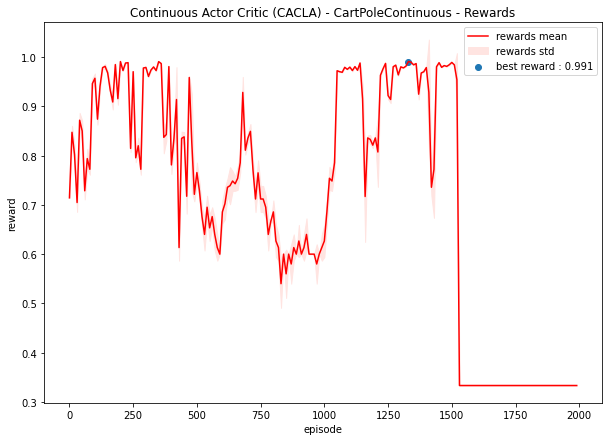

In [6]:
inf = np.array(cacla.list_rewards_mean) - np.array(cacla.list_rewards_std)
sup = np.array(cacla.list_rewards_mean) + np.array(cacla.list_rewards_std)
plt.figure(figsize=(10,7))
plt.plot(np.arange(0,cacla.nb_episode,cacla.test_frequency),cacla.list_rewards_mean, c= 'r',label = 'rewards mean')
plt.fill_between(np.arange(0,cacla.nb_episode,cacla.test_frequency),inf,sup , color="mistyrose", label="rewards std")
plt.scatter(cacla.list_rewards_mean.index(max(cacla.list_rewards_mean))*cacla.test_frequency,max(cacla.list_rewards_mean),label="best reward : "+str(round(cacla.best_value,3)) )
plt.legend()
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('Continuous Actor Critic (CACLA) - CartPoleContinuous - Rewards')
plt.show()

## Démonstration de la simulation 

In [8]:
env = ContinuousCartPoleEnv()
state = env.reset()
done = False
i = 0
cum_sum = 0.0
while not done :
    state_t = torch.as_tensor(state , dtype=torch.float32)
    action =  cacla.best_model(state_t).detach().numpy()
    new_state,reward,done = env.step(action)
    env.render()
    state = new_state
    cum_sum += reward
    i += 1
print(f"rewards cumulated : {cum_sum} and number iteration : {i}")
env.close()

rewards cumulated : 226.0 and number iteration : 228
